In [1]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception

In [2]:
# Print the current working directory
print("Current working directory:", os.getcwd())

base_dir = "c:/Users/KatreeceHattaway/OneDrive - Sock Club/Desktop/UT_Data_Boot_Camp/ML_pneumonia_identification/Resources"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Check if directories exist
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))
print("Test directory exists:", os.path.exists(test_dir))

Current working directory: c:\Users\KatreeceHattaway\OneDrive - Sock Club\Desktop\UT_Data_Boot_Camp\ML_pneumonia_identification\Resources
Train directory exists: True
Validation directory exists: True
Test directory exists: True


In [10]:
# Set the number of images to loop through
num_train_images = 2000
num_val_images = 16
num_test_images = 300

In [11]:
# Define data generators with rescaling
train = ImageDataGenerator(rescale=1/224)
validation = ImageDataGenerator(rescale=1/224)
test = ImageDataGenerator(rescale=1/224)

In [12]:
# Load the images from directories with specified number of images
train_data_gen = train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_data_gen = validation.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_data_gen = test.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

# Print class indices to verify
print("Class indices:", train_data_gen.class_indices)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [13]:
# Create and compile the model
from tensorflow.keras import layers, models

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(
    train_data_gen,
    epochs=10,
    validation_data=val_data_gen,
    steps_per_epoch=num_train_images // 32,
    validation_steps=num_val_images // 32
)

Epoch 1/10


c:\Users\KatreeceHattaway\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8369 - loss: 0.3683 - val_accuracy: 0.9375 - val_loss: 0.2168
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9439 - loss: 0.1492 - val_accuracy: 0.9375 - val_loss: 0.2184
Epoch 3/10
39/62 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9574 - loss: 0.1176

c:\Users\KatreeceHattaway\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 60s 961ms/step - accuracy: 0.9580 - loss: 0.1170 - val_accuracy: 0.6250 - val_loss: 0.6592
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9544 - loss: 0.1119 - val_accuracy: 0.6250 - val_loss: 1.0246
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9556 - loss: 0.1142 - val_accuracy: 0.6250 - val_loss: 0.5224
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9655 - loss: 0.1117 - val_accuracy: 0.9375 - val_loss: 0.1912
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9719 - loss: 0.0926 - val_accuracy: 0.8125 - val_loss: 0.3974
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9623 - loss: 0.1097 - val_accuracy: 0.8125 - val_loss: 0.2414
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9314 - loss: 0.1750 - val_accuracy: 0.6250 - val_loss: 0.7251
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9511 - loss: 0.1284 - val_accuracy: 0.6250 - val_loss: 0.

In [28]:
# Evaluate the model
test_data_gen.reset()  # Reset the generator to avoid issues
test_loss, test_acc = model.evaluate(test_data_gen, steps=num_test_images // 32)
print(f"Test Accuracy: {test_acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.6057 - loss: 1.0403
Test Accuracy: 0.52


In [29]:
# Predict on the test set
y_pred = model.predict(test_data_gen, steps=num_test_images // 32)
y_pred_classes = np.round(y_pred).astype(int).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step


In [30]:
# Collect true labels
y_true = []
test_data_gen.reset()  # Reset the generator to avoid issues
for _ in range(num_test_images // 32):
    batch = next(test_data_gen)
    y_true.extend(batch[1])
y_true = np.array(y_true[:len(y_pred_classes)])

In [31]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred_classes, average='weighted', zero_division=1)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 51.56%
Precision: 1.00
Recall: 0.52
F1 Score: 0.68


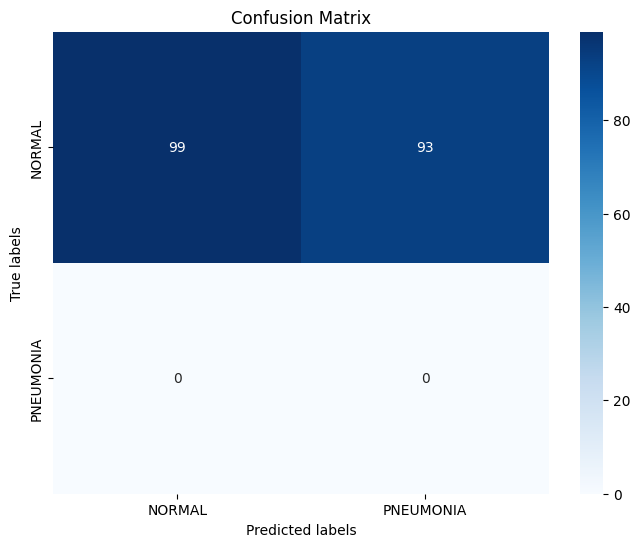

In [32]:
# Get confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

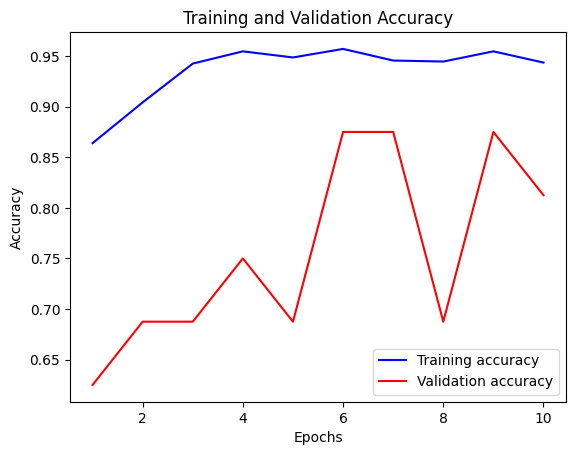

In [33]:
# Plot training accuracy over epochs
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [34]:
# try with out validation data